<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr
import ssl

Загрузить датасет по url:


In [39]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url = "http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df = pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [54]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

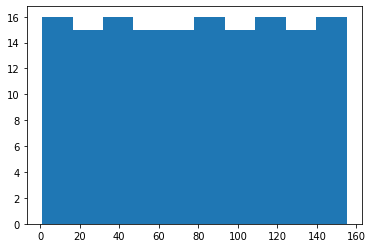

In [81]:
freedom = df['Freedom']
pos_affect = df['Positive affect']

plt.hist(freedom, 10)
ax.grid(True)
plt.show()

# равномерное распределение

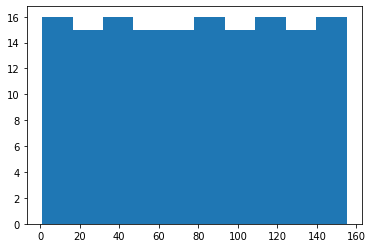

In [55]:
plt.hist(pos_affect, 10)
ax.grid(True)
plt.show()

# равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [79]:
df[df['Freedom'].isnull()]
df = df.loc[df['Country (region)']!='Qatar', :] 
# ^ был выброс, и мы его удалили

print('Медиана: ', statistics.median(freedom))
print('Стандартное отклонение:', statistics.pstdev(freedom))
print('Дисперсия:', statistics.pvariance(freedom))
print('Min:', min(freedom))
print('Max:', max(freedom))
print('Размах:', max(freedom) - min(freedom))

Медиана:  78.0
Стандартное отклонение: 44.74371464239419
Дисперсия: 2002.0
Min: 1.0
Max: 155.0
Размах: 154.0


Почему нельзя найти моду?

In [0]:
# StatisticsError: no unique mode; found 155 equally common values
# нет уникального значения -  155 одинково популярных значений

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601657


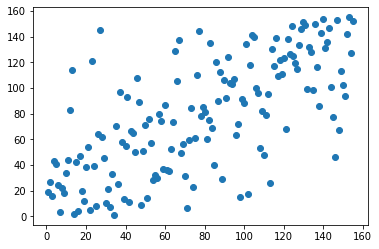

In [85]:
corr, p_value = pearsonr(freedom, pos_affect)
plt.scatter(freedom, pos_affect)
print('Коэффициент корреляции Пирсона:', corr)
# корреляция есть

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [88]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(df[['Freedom', 'Positive affect']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1
0,0.025974,0.259740
1,0.032468,0.149351
2,0.012987,0.097403
3,0.038961,0.012987
4,0.116883,0.071429


Построить матрицу корреляций для всех колонок таблицы

Загрузить таблицу цен на авокадо: 

In [46]:
import io
import requests
url = "http://yustiks.ru/avocado.csv"
avo = pd.read_csv(url)
avo[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

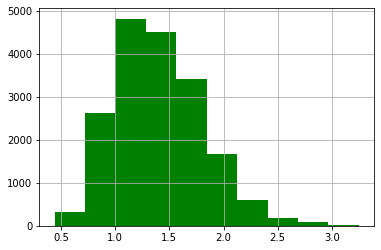

In [49]:
n, bins, patches = plt.hist(avo['AveragePrice'], 10, facecolor='g')
plt.grid(True)
plt.show()

# Нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

Коэффициент корреляции Пирсона для 4046: -0.2083170484878848
Коэффициент корреляции Пирсона для 4225: -0.1729277725093354
Коэффициент корреляции Пирсона для 4770: -0.17944598397975622


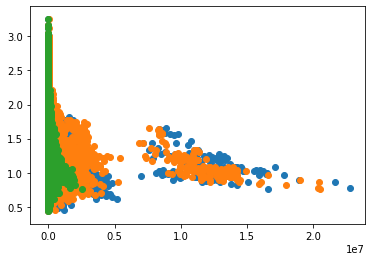

In [93]:
col4046 = avo['4046']
col4225 = avo['4225']
col4770 = avo['4770']
ave_pr = avo['AveragePrice']

corr, p_value = pearsonr(col4046, ave_pr)
plt.scatter(col4046, ave_pr)
print('Коэффициент корреляции Пирсона для 4046:', corr)
# обратная корреляция

corr, p_value = pearsonr(col4225, ave_pr)
plt.scatter(col4225, ave_pr)
print('Коэффициент корреляции Пирсона для 4225:', corr)
# обратная корреляция

corr, p_value = pearsonr(col4770, ave_pr)
plt.scatter(col4770, ave_pr)
print('Коэффициент корреляции Пирсона для 4770:', corr)
# обратная корреляция
